In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import pandas as pd
import matplotlib.ticker as ticker

data_dir = path.join("Data","wikt")
labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins","wiktionary"]

### Cluster Size Distribution

In [9]:
wikt_distribution = np.loadtxt(path.join(data_dir, "wikt_distribution.csv"))
paiceHusk_distribution = np.loadtxt(path.join(data_dir, "paiceHusk_distribution.csv"))
krovetz_distribution = np.loadtxt(path.join(data_dir, "krovetz_distribution.csv"))
sStripping_distribution = np.loadtxt(path.join(data_dir, "sStripping_distribution.csv"))
porter2_distribution = np.loadtxt(path.join(data_dir, "porter2_distribution.csv"))
lovins_distribution = np.loadtxt(path.join(data_dir, "lovins_distribution.csv"))

In [10]:
data = {
    "wiktionary": wikt_distribution
}
wikt = pd.DataFrame(data=data)
wikt = wikt.reset_index().melt(id_vars=["index"])
wikt = wikt.rename(columns={"variable":"stemmer"})

data = {
    "paiceHusk" : paiceHusk_distribution
}
paiceHusk = pd.DataFrame(data=data)
paiceHusk = paiceHusk.reset_index().melt(id_vars=["index"])
paiceHusk = paiceHusk.rename(columns={"variable":"stemmer"})

data = {
    "krovetz" : krovetz_distribution
}
krovetz = pd.DataFrame(data=data)
krovetz = krovetz.reset_index().melt(id_vars=["index"])
krovetz = krovetz.rename(columns={"variable":"stemmer"})

data={
    "sStripping" : sStripping_distribution
}
sStripping = pd.DataFrame(data=data)
sStripping = sStripping.reset_index().melt(id_vars=["index"])
sStripping = sStripping.rename(columns={"variable":"stemmer"})

data={
    "porter2" : porter2_distribution
}
porter2 = pd.DataFrame(data=data)
porter2 = porter2.reset_index().melt(id_vars=["index"])
porter2 = porter2.rename(columns={"variable":"stemmer"})

data={
    "lovins" : lovins_distribution
}
lovins = pd.DataFrame(data=data)
lovins = lovins.reset_index().melt(id_vars=["index"])
lovins = lovins.rename(columns={"variable":"stemmer"})


cluster_sizes = pd.concat([wikt,paiceHusk,krovetz,sStripping,porter2,lovins])
display(cluster_sizes)

,index,stemmer,value
0,0,wiktionary,1.0
1,1,wiktionary,1.0
2,2,wiktionary,1.0
3,3,wiktionary,1.0
4,4,wiktionary,1.0
...,...,...,...
236067,236067,lovins,1.0
236068,236068,lovins,1.0
236069,236069,lovins,1.0
236070,236070,lovins,1.0


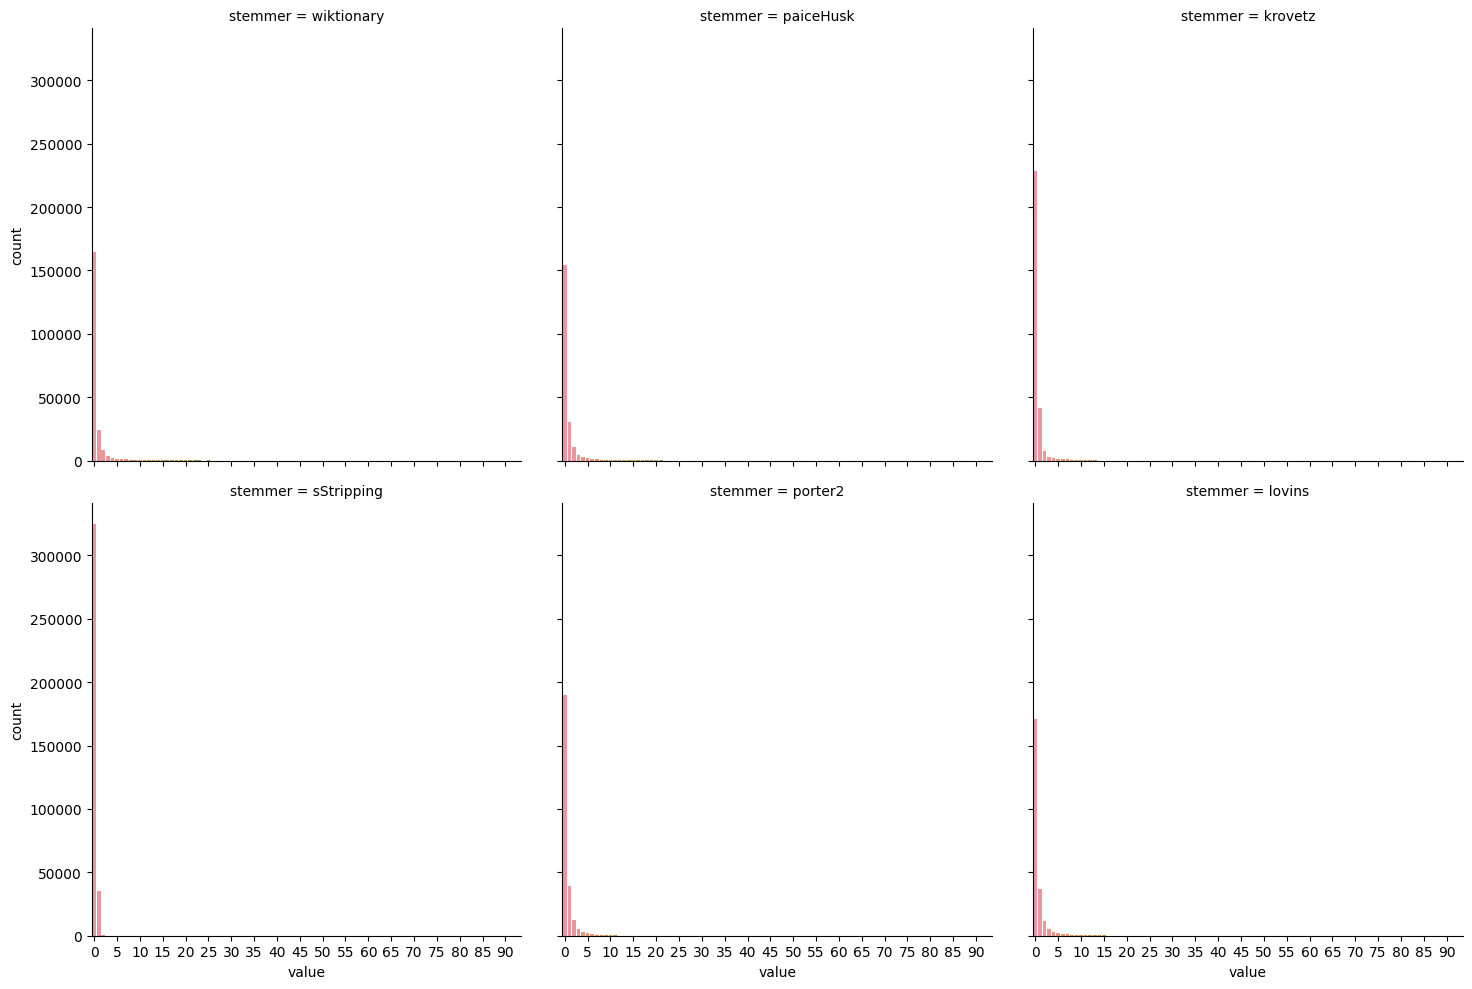

In [11]:
axes = sns.catplot(data=cluster_sizes, kind="count", x="value", col="stemmer", col_wrap=3)
for ax in axes.axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

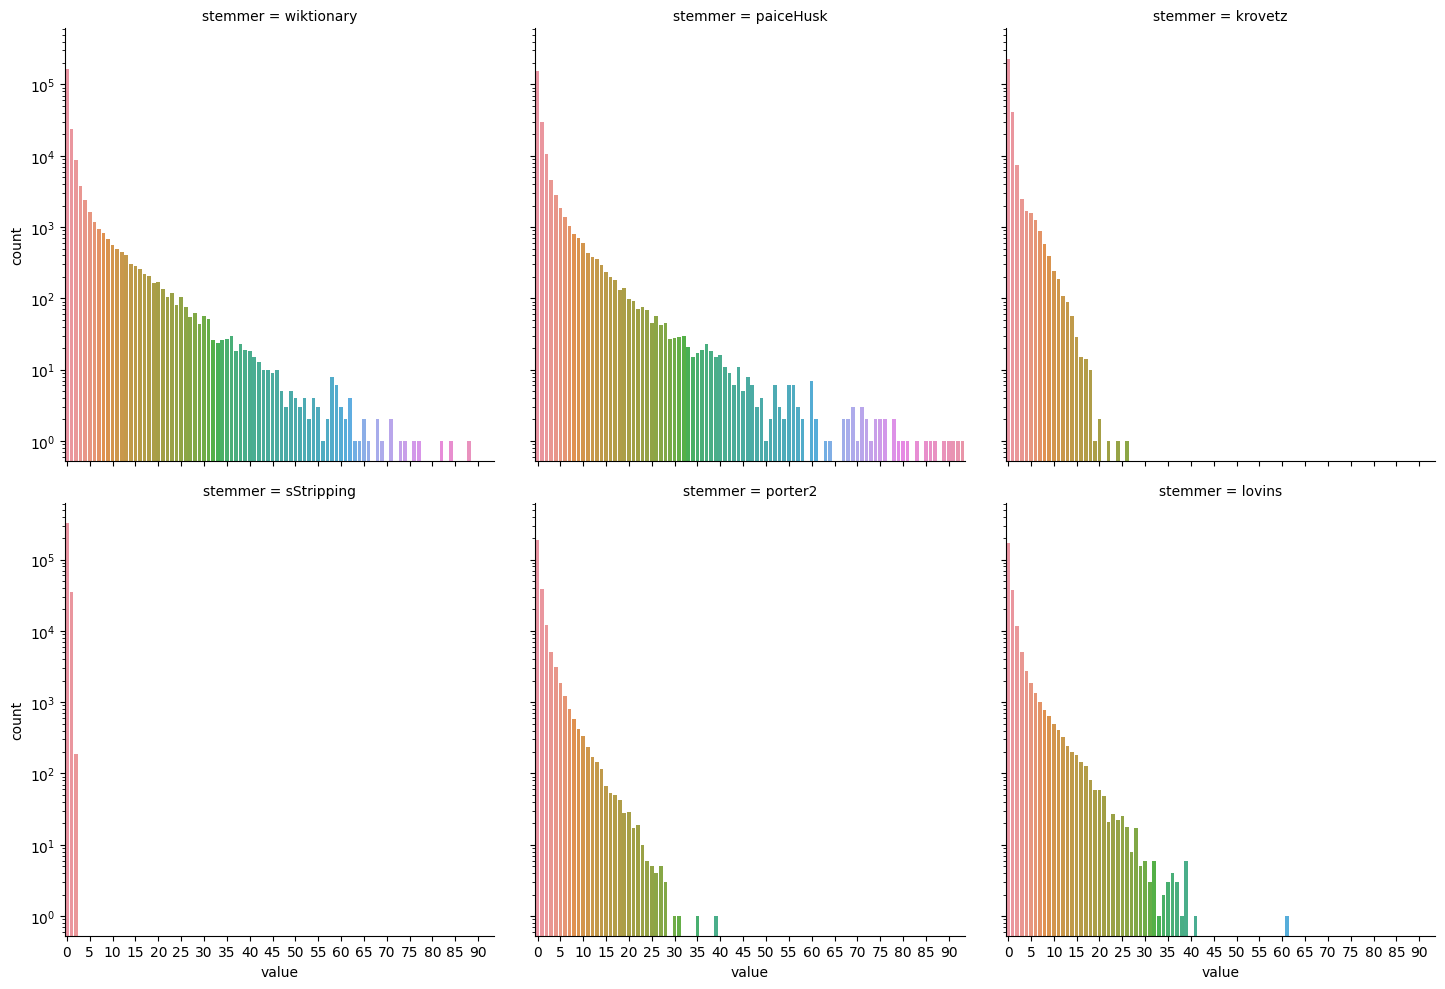

In [12]:
axes = sns.catplot(data=cluster_sizes, kind="count", x="value", col="stemmer", col_wrap=3)
for ax in axes.axes:
    ax.set_yscale("log")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

### Number of Clusters

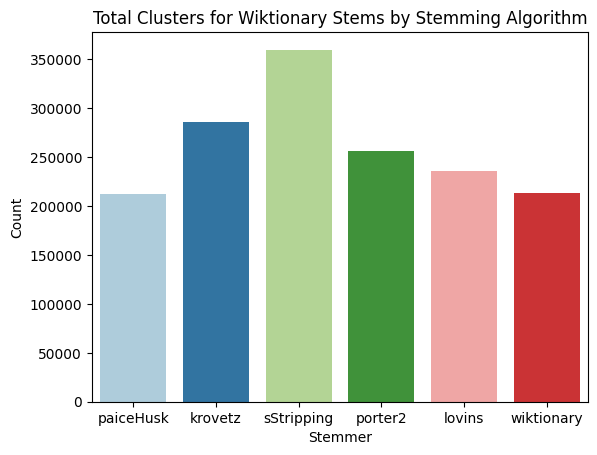

In [13]:
data = [len(paiceHusk_distribution),len(krovetz_distribution),len(sStripping_distribution),len(porter2_distribution),len(lovins_distribution),len(wikt_distribution)]
sns.barplot(x=labels, y=data, palette=sns.color_palette("Paired"))
plt.title("Total Clusters for Wiktionary Stems by Stemming Algorithm")
plt.xlabel("Stemmer")
plt.ylabel("Count")
plt.show()

### Word Distances

In [14]:
paiceHusk_word_distances = np.loadtxt(path.join(data_dir, "paiceHusk_word_distances.csv"))
krovetz_word_distances = np.loadtxt(path.join(data_dir, "krovetz_word_distances.csv"))
sStripping_word_distances = np.loadtxt(path.join(data_dir, "sStripping_word_distances.csv"))
porter2_word_distances = np.loadtxt(path.join(data_dir, "porter2_word_distances.csv"))
lovins_word_distances = np.loadtxt(path.join(data_dir, "lovins_word_distances.csv"))

In [15]:
data = {
    "paiceHusk" : paiceHusk_word_distances
}
paiceHusk = pd.DataFrame(data=data)
paiceHusk = paiceHusk.reset_index().melt(id_vars=["index"])
paiceHusk = paiceHusk.rename(columns={"variable":"stemmer"})

data = {
    "krovetz" : krovetz_word_distances
}
krovetz = pd.DataFrame(data=data)
krovetz = krovetz.reset_index().melt(id_vars=["index"])
krovetz = krovetz.rename(columns={"variable":"stemmer"})

data={
    "sStripping" : sStripping_word_distances
}
sStripping = pd.DataFrame(data=data)
sStripping = sStripping.reset_index().melt(id_vars=["index"])
sStripping = sStripping.rename(columns={"variable":"stemmer"})

data={
    "porter2" : porter2_word_distances
}
porter2 = pd.DataFrame(data=data)
porter2 = porter2.reset_index().melt(id_vars=["index"])
porter2 = porter2.rename(columns={"variable":"stemmer"})

data={
    "lovins" : lovins_word_distances
}
lovins = pd.DataFrame(data=data)
lovins = lovins.reset_index().melt(id_vars=["index"])
lovins = lovins.rename(columns={"variable":"stemmer"})


word_distances = pd.concat([paiceHusk,krovetz,sStripping,porter2,lovins])
display(word_distances)

,index,stemmer,value
0,0,paiceHusk,0.0
1,1,paiceHusk,0.0
2,2,paiceHusk,0.0
3,3,paiceHusk,1.0
4,4,paiceHusk,0.0
...,...,...,...
395281,395281,lovins,1.0
395282,395282,lovins,0.0
395283,395283,lovins,1.0
395284,395284,lovins,0.0


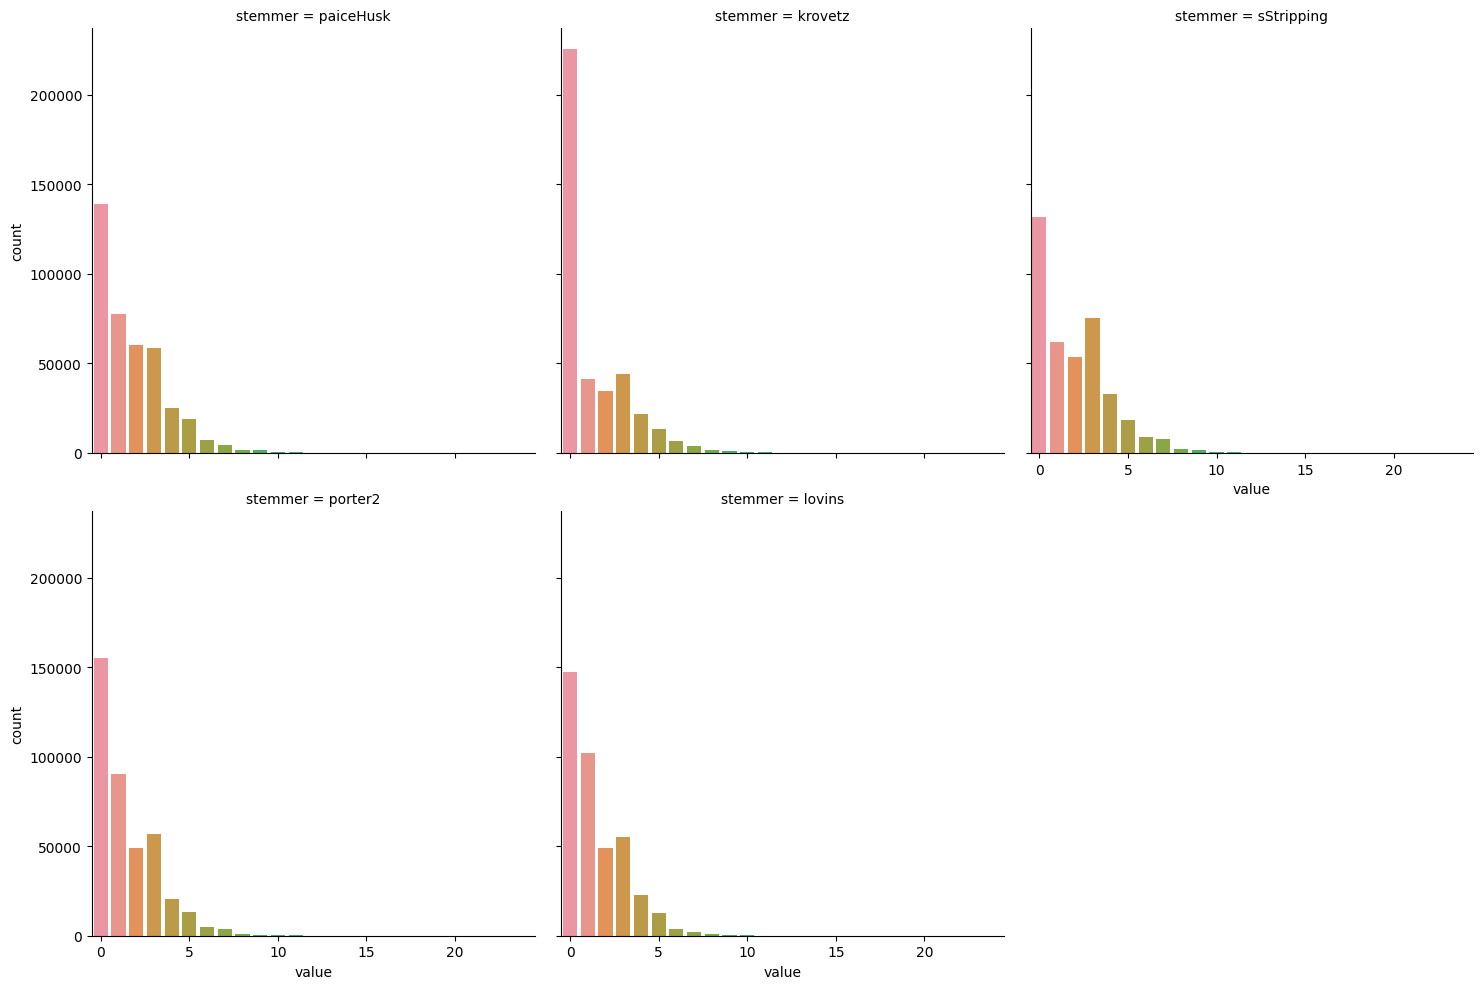

In [16]:
axes = sns.catplot(data=word_distances, kind="count", x="value", col="stemmer", col_wrap=3)
for ax in axes.axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

### Average Cluster F-Measure

In [18]:
paiceHusk_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "paiceHusk_cluster_fmeasures.csv"))
krovetz_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "krovetz_cluster_fmeasures.csv"))
sStripping_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "sStripping_cluster_fmeasures.csv"))
porter2_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "porter2_cluster_fmeasures.csv"))
lovins_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "lovins_cluster_fmeasures.csv"))

before = [paiceHusk_before_cluster_fmeasures, krovetz_before_cluster_fmeasures, sStripping_before_cluster_fmeasures, porter2_before_cluster_fmeasures, lovins_before_cluster_fmeasures]

In [19]:
averages = list()
for stemmer in before:
    averages.append(stemmer.mean())
# for stemmer in after:
    # averages.append(stemmer.mean())

data = {
    "Stemmer" : labels[:-1],
    # "With/Without" : ["With Singles"]*5 + ["Without Singles"]*5,
    "F-Measure" : averages
}

average_fmeasures = pd.DataFrame(data=data)
display(average_fmeasures)

,Stemmer,F-Measure
0,paiceHusk,0.826689
1,krovetz,0.768557
2,sStripping,0.647007
3,porter2,0.792331
4,lovins,0.797168


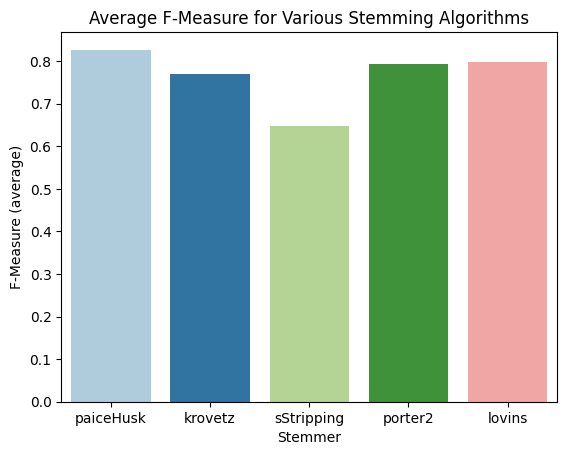

In [20]:
sns.barplot(x="Stemmer", y="F-Measure", data=average_fmeasures, palette=sns.color_palette("Paired"))
plt.title("Average F-Measure for Various Stemming Algorithms")
plt.ylabel("F-Measure (average)")
plt.show()

### Cluster F-Measures (with clusters of size 1)

In [21]:
data = {
    "paiceHusk" : paiceHusk_before_cluster_fmeasures
}
paiceHusk = pd.DataFrame(data=data)
paiceHusk = paiceHusk.reset_index().melt(id_vars=["index"])
paiceHusk = paiceHusk.rename(columns={"variable":"stemmer"})

data = {
    "krovetz" : krovetz_before_cluster_fmeasures
}
krovetz = pd.DataFrame(data=data)
krovetz = krovetz.reset_index().melt(id_vars=["index"])
krovetz = krovetz.rename(columns={"variable":"stemmer"})

data={
    "sStripping" : sStripping_before_cluster_fmeasures
}
sStripping = pd.DataFrame(data=data)
sStripping = sStripping.reset_index().melt(id_vars=["index"])
sStripping = sStripping.rename(columns={"variable":"stemmer"})

data={
    "porter2" : porter2_before_cluster_fmeasures
}
porter2 = pd.DataFrame(data=data)
porter2 = porter2.reset_index().melt(id_vars=["index"])
porter2 = porter2.rename(columns={"variable":"stemmer"})

data={
    "lovins" : lovins_before_cluster_fmeasures
}
lovins = pd.DataFrame(data=data)
lovins = lovins.reset_index().melt(id_vars=["index"])
lovins = lovins.rename(columns={"variable":"stemmer"})

In [22]:
fmeasures_before = pd.concat([paiceHusk,krovetz,sStripping,porter2,lovins])
display(fmeasures_before)

,index,stemmer,value
0,0,paiceHusk,1.0
1,1,paiceHusk,1.0
2,2,paiceHusk,1.0
3,3,paiceHusk,1.0
4,4,paiceHusk,1.0
...,...,...,...
236067,236067,lovins,1.0
236068,236068,lovins,1.0
236069,236069,lovins,1.0
236070,236070,lovins,1.0


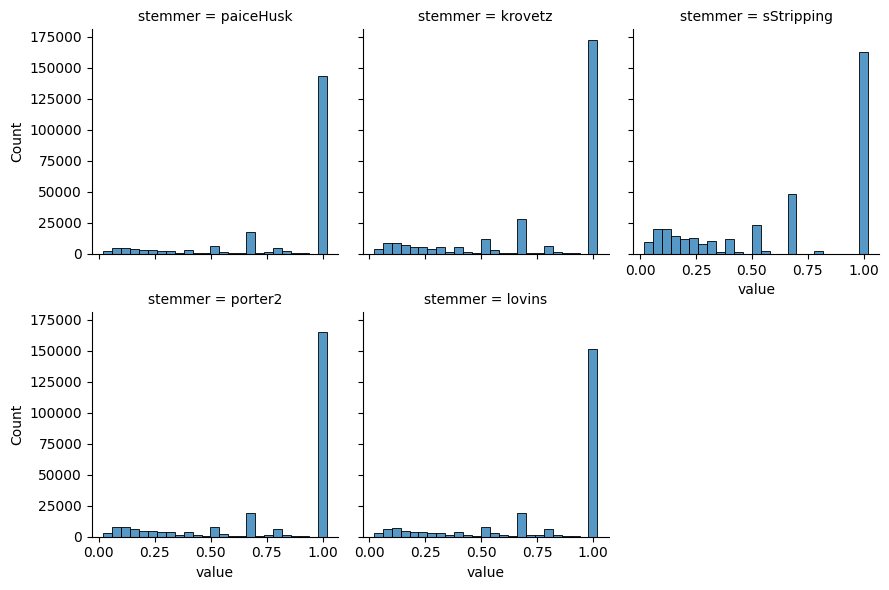

In [23]:
g = sns.FacetGrid(fmeasures_before, col="stemmer", col_wrap=3)
g.map_dataframe(sns.histplot, x="value", binwidth=0.04)